# ML LAB ASSIGNMENT 8  

# NAIVE BAYES ALGORITHM IMPLEMENTATION 

### Name: Madhumithaa RP | Reg No: 20BCE1648 

### Implementing the necessary libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\abhia\Desktop\VIT SEM6\ML\Lab\Lab3\final.csv")
data.head(10)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,99077735,7,5,373,11595,367,0,53.285714,138.353068,...,20,1036.0,0.0,1036,1036,98900000.0,0.0,98900000,98900000,4
1,1010,42,1,1,0,6,0,0,0.000000,0.000000,...,40,0.0,0.0,0,0,0.0,0.0,0,0,10
2,15003,43,1,1,2,6,2,2,2.000000,0.000000,...,24,0.0,0.0,0,0,0.0,0.0,0,0,10
3,8080,82322,26,34,70312,320,6060,0,2704.307692,1652.450175,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
4,80,84813161,6,6,355,11595,355,0,59.166667,144.928143,...,32,4.0,0.0,4,4,84700000.0,0.0,84700000,84700000,4
5,9090,71,1,1,2,6,2,2,2.000000,0.000000,...,24,0.0,0.0,0,0,0.0,0.0,0,0,10
6,80,3000585,3,0,0,0,0,0,0.000000,0.000000,...,40,0.0,0.0,0,0,0.0,0.0,0,0,6
7,8080,60469,4,3,207,134,195,0,51.750000,95.541876,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
8,21,9182361,9,15,105,188,23,0,11.666667,9.300538,...,32,0.0,0.0,0,0,0.0,0.0,0,0,7
9,22,106,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,11


### Mapping the attributes and their correlation

<AxesSubplot:>

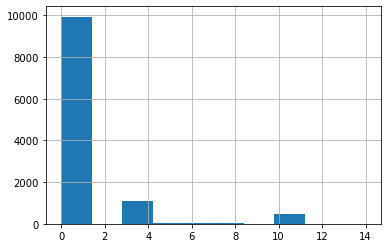

In [4]:
data["Label"].hist()

<AxesSubplot:>

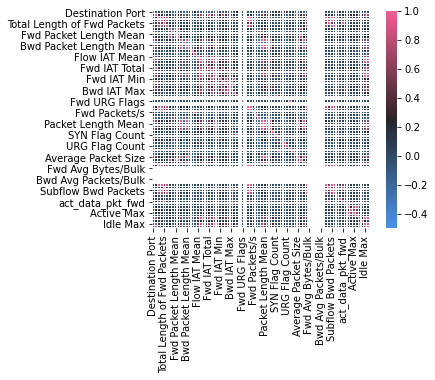

In [5]:
corr = data.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

In [7]:
data = data[["Destination Port", "SYN Flag Count", "Fwd Avg Bytes/Bulk", "Bwd Avg Packets/Bulk", "Label"]]
data.head(10)

,Destination Port,SYN Flag Count,Fwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Label
0,80,0,0,0,4
1,1010,0,0,0,10
2,15003,0,0,0,10
3,8080,0,0,0,1
4,80,0,0,0,4
5,9090,0,0,0,10
6,80,0,0,0,6
7,8080,0,0,0,1
8,21,0,0,0,7
9,22,0,0,0,11


C:\Users\abhia\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\abhia\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='SYN Flag Count', ylabel='Count'>

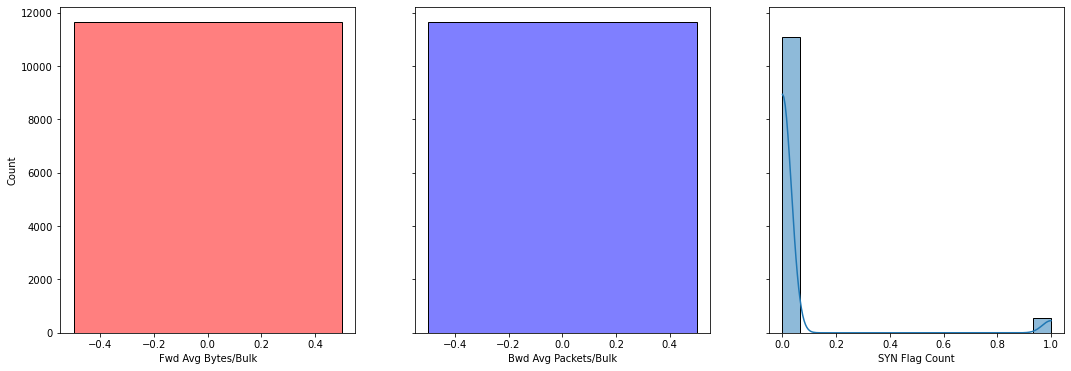

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(data, ax=axes[0], x="Fwd Avg Bytes/Bulk", kde=True, color='r')
sns.histplot(data, ax=axes[1], x="Bwd Avg Packets/Bulk", kde=True, color='b')
sns.histplot(data, ax=axes[2], x="SYN Flag Count", kde=True)


## Calculate P(Y=y) for all possible y

In [9]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

## Approach 1: Calculate P(X=x|Y=y) using Gaussian distribution formula

In [10]:
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

## Calculate P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) * P(Y=y) for all y and find the maximum

In [11]:
def naive_bayes_gaussian(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred) 

## Testing this Gaussian model

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="Label")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

## Convert continuous features to Categorical features

In [18]:
data["Con_Fwd Avg Bytes/Bulk"] = pd.cut(data["Fwd Avg Bytes/Bulk"].values, bins = 3, labels = [0,1,2])
data["Con_Bwd Avg Packets/Bulk"] = pd.cut(data["Bwd Avg Packets/Bulk"].values, bins = 3, labels = [0,1,2])

data = data[["Con_Fwd Avg Bytes/Bulk",	"Con_Bwd Avg Packets/Bulk", "Label"]]
data.head(10)

,Con_Fwd Avg Bytes/Bulk,Con_Bwd Avg Packets/Bulk,Label
0,1,1,4
1,1,1,10
2,1,1,10
3,1,1,1
4,1,1,4
5,1,1,10
6,1,1,6
7,1,1,1
8,1,1,7
9,1,1,11


## Approach 2: Calculate P(X=x|Y=y) categorically

In [19]:
def calculate_likelihood_categorical(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    p_x_given_y = len(df[df[feat_name]==feat_val]) / len(df)
    return p_x_given_y

## Calculate P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) * P(Y=y) for all y and find the maximum

In [20]:
def naive_bayes_categorical(df, X, Y):
    features = list(df.columns)[:-1]

    prior = calculate_prior(df, Y)

    Y_pred = []
    for x in X:
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_categorical(df, features[i], x[i], Y, labels[j])

        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred) 

## Test Categorical model

In [22]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_categorical(train, X=X_test, Y="Label")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

[[1987    0    0    0    0    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0]
 [  12    0    0    0    0    0    0    0    0    0    0    0    0]
 [ 205    0    0    0    0    0    0    0    0    0    0    0    0]
 [   5    0    0    0    0    0    0    0    0    0    0    0    0]
 [   4    0    0    0    0    0    0    0    0    0    0    0    0]
 [   4    0    0    0    0    0    0    0    0    0    0    0    0]
 [ 103    0    0    0    0    0    0    0    0    0    0    0    0]
 [   3    0    0    0    0    0    0    0    0    0    0    0    0]
 [   2    0    0    0    0    0    0    0    0    0    0    0    0]
 [   2    0    0    0    0    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0]]


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].